Epoch [100/1000], Loss: 5.6644
Epoch [200/1000], Loss: 5.0547
Epoch [300/1000], Loss: 4.9976
Epoch [400/1000], Loss: 4.9704
Epoch [500/1000], Loss: 4.8910
Epoch [600/1000], Loss: 4.4515
Epoch [700/1000], Loss: 3.7437
Epoch [800/1000], Loss: 3.6859
Epoch [900/1000], Loss: 3.6551
Epoch [1000/1000], Loss: 3.6356


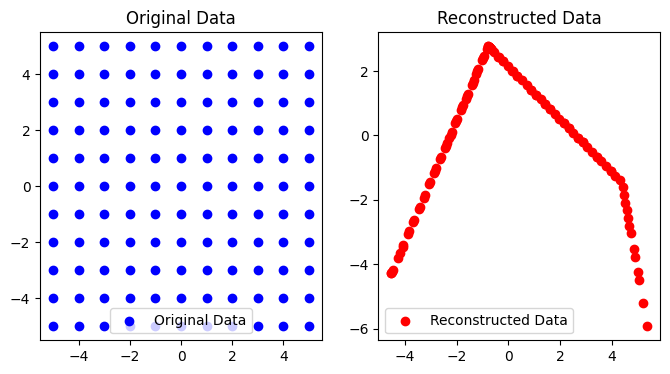

In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.decoder(x)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim)
        self.decoder = Decoder(hidden_dim, output_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

data = np.array([[x, y] for x in range(-5, 6) for y in range(-5, 6)], dtype=np.float32)
data = torch.tensor(data)

input_dim = 2
hidden_dim = 3
output_dim = 2

model = Autoencoder(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    output = model(data)
    loss = criterion(output, data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

encoded_data = model.encoder(data).detach().numpy()
decoded_data = model(data).detach().numpy()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(decoded_data[:, 0], decoded_data[:, 1], c='red', label='Reconstructed Data')
plt.title('Reconstructed Data')
plt.legend()

plt.show()
